<h1 style="text-align: center;" markdown="1">Predicting Power Output in Large-Scale Wave Energy Farms</h1> 
<h2 style="text-align: center;" markdown="2">Optimisation of large wave farms using a multi strategy evolutionary framework</h2>
<h3 style="text-align: center;" markdown="3">Kevin Obote (ADM: 190696)</h3>

## Introduction

### Background
Wave energy is an emerging renewable energy source that utilizes ocean waves to generate electricity. It offers significant potential to address global energy and climate challenges. However, optimizing energy output from large-scale wave energy farms involves complex calculations due to the hydrodynamic interactions between multiple wave energy converters (WECs). Efficient and accurate prediction models are essential for maximizing power output and advancing wave energy technology.

### Research Problem
This project focuses on optimizing the total power output of large-scale wave energy farms. The dataset comprises configurations of 49 and 100 WECs and their corresponding power outputs. The challenge is to predict the total power output based on these configurations, considering the complex interactions among WECs that impact overall efficiency.

### Objectives

1. **Analyze Key Features**: Identify and evaluate the most significant features influencing power output.
2. **Develop a Predictive Model**: Build a machine learning model to estimate the total power output of wave farms based on WEC configurations.
3. **Optimize Model Performance**: Apply various machine learning techniques and assess their performance to enhance model accuracy and efficiency.

### Hypothesis
1. **Impact of WEC Configuration**: The arrangement of WECs significantly affects the total power output of a wave farm.
2. **Machine Learning Effectiveness**: A well-trained machine learning model can predict power output accurately, reducing the need for complex hydrodynamic simulations.

## Methodology, Results, and Discussion

### Data Description
The dataset used for this project is designed to create a surrogate model for predicting the total power output of wave farms. It contains 63,600 instances and 149 features related to WEC configurations under different wave scenarios.

#### Source of Data
- **Creators**: Mehdi Neshat, Bradley Alexander, Nataliia Sergiienko, Markus Wagner
- **Published**: 2023
- **License**: Creative Commons Attribution 4.0 International (CC BY 4.0)
- **DOI**: [10.24432/C5GG7Q](https://doi.org/10.24432/C5GG7Q)

#### Period Collected
- **Year and Month/Day**: Donated on September 16, 2023.

#### How it was Collected
The dataset was generated using a multi-strategy evolutionary framework to optimize wave farms, with simulations run on the Phoenix HPC service at the University of Adelaide.

#### Under What Conditions it was Collected
The data was collected through extensive simulations accounting for hydrodynamic interactions between WECs in various configurations.

#### Variables
| Variable Name | Role    | Type    | Description                              | Units | Missing Values |
| ------------- | ------- | ------- | ---------------------------------------- | ----- | --------------- |
| X1            | Feature | Integer | X-coordinate of the 1st WEC              | -     | No              |
| Y1            | Feature | Integer | Y-coordinate of the 1st WEC              | -     | No              |
| ...           | ...     | ...     | ...                                      | ...   | ...             |
| Xn            | Feature | Integer | X-coordinate of the nth WEC              | -     | No              |
| Yn            | Feature | Integer | Y-coordinate of the nth WEC              | -     | No              |
| Power         | Target  | Real    | Total power output of the wave farm      | kW    | No              |
| qW            | Feature | Real    | Hydrodynamic interaction factor          | -     | No              |

### Importance of Spatial Coordinates

In the context of wave energy converters (WECs), the spatial coordinates and power output are key factors for optimizing wave farm performance.

#### Spatial Coordinates (x, y):
- **x**: Represents the horizontal position of a WEC within the wave farm. It specifies the x-axis position in the coordinate system used for layout.
- **y**: Represents the vertical position of a WEC, specifying the y-axis position in the coordinate system.
- **qW**: Together, x and y coordinates determine the spatial arrangement of WECs. This arrangement is crucial for understanding hydrodynamic interactions (qW) and optimizing the wave farm’s power output.

#### Total_Power:
- **Total_Power**: Indicates the total electrical power generated by the wave energy farm, calculated as the sum of all individual WEC power outputs. It is measured in kilowatts (kW) or megawatts (MW).
- **Significance**: Total_Power is the primary performance metric. Optimizing WEC layout and configuration can significantly impact this value by maximizing energy capture and minimizing inefficiencies due to hydrodynamic interactions.

### Correlation Analysis

For predicting Total_Power, key features include:

1. **Spatial Coordinates (x, y)**: The arrangement of WECs influences wave interactions and power output.
2. **Hydrodynamic Factors (qW)**: Features like qW, which represent hydrodynamic performance, are crucial as they directly affect energy conversion efficiency.
3. **Environmental Conditions**: If available, features such as wave height, period, and water depth should also be considered, as they impact power output.

#### Correlation Results:
- **High Correlation with Total_Power**: Features with high correlation values (e.g., qW) are important predictors of power output. For instance, qW has a correlation coefficient of approximately 0.96 to 0.99 with Total_Power across different datasets, indicating a strong relationship and suggesting that qW is a significant predictor of power output.

### Summary

Understanding the role of spatial coordinates and hydrodynamic factors in wave energy farms is essential for optimizing power output. Accurate models incorporating these features can improve predictions and enhance the efficiency of wave energy converters in large-scale deployments.

## Step 1 : Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_error, r2_score, mean_squared_error



# Step 2: Load the dataset and dipaly information about the datasets

In [2]:
# Load the datasets
perth_49 = pd.read_csv('WEC_Perth_49.csv')
perth_100 = pd.read_csv('WEC_Perth_100.csv')
sydney_49 = pd.read_csv('WEC_Sydney_49.csv')
sydney_100 = pd.read_csv('WEC_Sydney_100.csv')


In [3]:
# Display the top 5 rows of the perth_49

perth_49.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77


In [4]:
# Display the top 5 rows of the sydeny_49

sydney_49.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,1.0,1.0,0.00,70.00,1.00,140.0,50.00,198.0,401.0,1.0,...,71909.82,70674.49,70972.33,90957.03,90903.63,87876.82,79499.23,68880.39,0.78,4065416.61
1,598.0,0.0,595.82,77.69,593.70,150.0,549.00,198.0,798.0,0.0,...,68757.68,70665.50,69963.48,84511.25,85691.70,85211.51,76678.20,76119.53,0.76,3951216.37
2,198.0,0.0,197.46,75.19,192.94,150.0,87.64,198.0,398.0,0.0,...,73675.80,77808.44,73519.82,91436.35,88770.60,86632.78,77932.46,69343.12,0.78,4022640.78
3,598.0,0.0,596.97,69.41,592.69,143.8,549.00,198.0,398.0,200.0,...,68947.21,71668.05,69380.67,85191.27,84453.12,85300.41,78573.25,72527.16,0.75,3879223.41
4,198.0,0.0,197.18,79.83,192.97,150.0,89.53,198.0,398.0,0.0,...,78367.97,79075.06,74354.03,85254.75,86978.69,86951.65,77671.87,74901.38,0.77,3974691.24


In [5]:
# Display the top 5 rows of the perth_100

perth_100.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power93,Power94,Power95,Power96,Power97,Power98,Power99,Power100,qW,Total_Power
0,1000.0,0.0,946.08,37.42,889.67,74.76,832.02,112.10,1250.0,1.0,...,98711.68,102872.82,100743.44,99259.87,98909.46,101388.37,101025.35,98676.66,0.75,7257985.04
1,800.0,0.0,746.04,37.38,689.81,74.79,632.43,111.97,1200.0,0.0,...,96351.38,102253.02,101744.20,99482.45,99304.59,101953.23,100878.42,99508.49,0.74,7103374.61
2,600.0,0.0,545.98,37.50,489.87,74.95,432.52,112.15,650.0,0.0,...,96985.29,102472.80,101757.63,99429.45,98709.14,101312.44,100979.86,99024.16,0.76,7335380.64
3,600.0,0.0,546.09,37.41,489.70,74.76,432.35,111.90,800.0,0.0,...,76823.85,88005.41,98779.92,100260.30,98744.25,101144.58,100835.43,98915.38,0.75,7187769.87
4,600.0,0.0,545.95,37.52,489.69,74.99,432.46,112.16,800.0,0.0,...,98195.95,102874.16,100256.15,99221.12,98969.54,101389.77,100924.02,98796.00,0.75,7260222.61


In [6]:
# Display the top 5 rows of the sydeny_100

sydney_100.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power93,Power94,Power95,Power96,Power97,Power98,Power99,Power100,qW,Total_Power
0,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,74018.52,71727.79,67966.45,63101.26,88826.02,86531.44,83786.68,73514.19,0.69,7247491.41
1,198.0,0.0,197.18,80.53,193.59,150.00,77.58,198.0,598.0,0.0,...,63702.46,67776.99,65133.52,63138.74,82852.91,83519.30,81973.65,71781.34,0.67,7119352.90
2,198.0,0.0,197.07,76.64,192.74,155.74,84.67,198.0,798.0,0.0,...,55788.34,59593.98,60073.60,59198.12,63377.08,72078.85,77435.62,67457.26,0.68,7148342.69
3,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,66961.48,65716.93,66637.89,62562.54,80858.08,82656.53,82171.28,71713.30,0.69,7317998.83
4,198.0,0.0,197.46,75.07,197.18,149.14,149.00,198.0,598.0,0.0,...,51814.27,59556.86,68341.92,70731.90,64192.86,69757.10,75581.40,69741.63,0.65,6925096.49


In [7]:
# Display information about the datasets

# Function to display information about a wec
def wec_info(df, name):
    print(f"\nInformation for {name}")
    print("-" * 40)
    print(df.info())
    print("\nShape:", df.shape)
    print("\nStatistical Summary:")
    print(df.describe())
    print("\nFirst few rows:")
    print(df.head())

In [8]:
# Displaying the shape, information and statistical summary for perth 49
wec_info(perth_49, "WEC Perth 49")


Information for WEC Perth 49
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36043 entries, 0 to 36042
Columns: 149 entries, X1 to Total_Power
dtypes: float64(149)
memory usage: 41.0 MB
None

Shape: (36043, 149)

Statistical Summary:
                 X1            Y1            X2            Y2            X3  \
count  36043.000000  36043.000000  36043.000000  36043.000000  36043.000000   
mean     366.597060     18.709550    426.314033     51.085762    477.295590   
std      307.911246     44.043295    265.781316     90.151852    270.322011   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       65.770000      0.000000    200.000000      0.000000    289.950000   
50%      250.000000      0.000000    346.090000     37.520000    400.000000   
75%      600.000000      0.000000    745.980000     37.900000    689.800000   
max     1000.000000    885.590000   1000.000000    939.260000   1000.000000   

          

In [9]:
# Displaying the shape, information and statistical summary for sydney 49
wec_info(sydney_49, "WEC Sydney 49")


Information for WEC Sydney 49
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Columns: 149 entries, X1 to Total_Power
dtypes: float64(149)
memory usage: 20.4 MB
None

Shape: (17964, 149)

Statistical Summary:
                 X1            Y1            X2            Y2            X3  \
count  17964.000000  17964.000000  17964.000000  17964.000000  17964.000000   
mean     138.863588      3.718730    142.885799     66.752149    148.172411   
std      167.910813     28.398116    166.600732     26.712075    166.469037   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000     51.000000      1.000000   
50%      198.000000      0.000000    195.960000     70.000000    192.360000   
75%      198.000000      1.000000    197.110000     75.650000    193.700000   
max     1000.000000    988.260000   1000.000000    989.650000   1000.000000   

         

In [10]:
# Displaying the shape, information and statistical summary for perth 100
wec_info(perth_100, "WEC Perth 100")



Information for WEC Perth 100
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7277 entries, 0 to 7276
Columns: 302 entries, X1 to Total_Power
dtypes: float64(302)
memory usage: 16.8 MB
None

Shape: (7277, 302)

Statistical Summary:
                X1           Y1           X2           Y2           X3  \
count  7277.000000  7277.000000  7277.000000  7277.000000  7277.000000   
mean    446.407261    15.870636   429.245818    44.186641   406.751613   
std     310.463546    77.125951   288.770531    46.994054   287.804577   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     200.000000     0.000000   146.230000    37.400000   103.000000   
50%     400.000000     0.000000   346.030000    37.480000   318.770000   
75%     600.000000     0.000000   546.090000    37.530000   489.870000   
max    1400.000000  1353.550000  1400.000000  1277.640000  1414.000000   

                Y3           X4           Y4           X5

In [11]:
# Displaying the shape, information and statistical summary for sydney 100
wec_info(sydney_100, "WEC Sydney 100")


Information for WEC Sydney 100
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Columns: 302 entries, X1 to Total_Power
dtypes: float64(302)
memory usage: 5.3 MB
None

Shape: (2318, 302)

Statistical Summary:
                X1           Y1           X2           Y2           X3  \
count  2318.000000  2318.000000  2318.000000  2318.000000  2318.000000   
mean    177.162584     8.159819   204.669676    64.119892   228.071639   
std     174.211383    52.395345   172.438092    79.224562   181.670898   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      48.000000     0.000000   100.000000    51.000000   192.570000   
50%     198.000000     0.000000   197.070000    72.520000   193.700000   
75%     198.000000     1.000000   201.000000    77.580000   250.000000   
max    1398.000000  1381.090000  1414.000000  1316.750000  1400.000000   

                Y3           X4           Y4           X5

In [12]:
# Function to compute and display summary statistics
def descriptive_statistics(df, name):
    print(f"\nDescriptive Statistics for {name}")
    print("-" * 40)

    # Mode for Total Power
    mode_total_power = df['Total_Power'].mode()
    print(f"\nMode of Total Power: {mode_total_power.values}")

    # Range for Total Power
    range_total_power = df['Total_Power'].max() - df['Total_Power'].min()
    print(f"Range of Total Power: {range_total_power}")

    # Standard Deviation for Total Power
    std_total_power = df['Total_Power'].std()
    print(f"Standard Deviation of Total Power: {std_total_power}")

    print("\n")

In [13]:

# Get the mode, range and std for perth 49
descriptive_statistics(perth_49, 'WEC Perth 49')



Descriptive Statistics for WEC Perth 49
----------------------------------------

Mode of Total Power: [3839018.13]
Range of Total Power: 788714.8200000003
Standard Deviation of Total Power: 122617.14992644225




In [14]:
# Get the mode, range and std for sydney 49
descriptive_statistics(sydney_49, 'WEC Sydney 49')


Descriptive Statistics for WEC Sydney 49
----------------------------------------

Mode of Total Power: [4008086.42]
Range of Total Power: 519817.8500000001
Standard Deviation of Total Power: 70704.62740723757




In [15]:
# Get the mode, range and std for perth 100
descriptive_statistics(perth_100, 'WEC Perth 100')


Descriptive Statistics for WEC Perth 100
----------------------------------------

Mode of Total Power: [7170866.71]
Range of Total Power: 1265047.3099999996
Standard Deviation of Total Power: 197931.4755592023




In [16]:
# Get the mode, range and std for sydney 100
descriptive_statistics(sydney_100, 'WEC Sydney 100')


Descriptive Statistics for WEC Sydney 100
----------------------------------------

Mode of Total Power: [7258766.2]
Range of Total Power: 894404.3600000003
Standard Deviation of Total Power: 106080.66957913544




In [17]:
# Function to check for and handle null values
def handle_null_values(df):
    print("\nChecking for null values:")
    null_values = df.isnull().sum()
    
    if null_values.any():
        print(null_values[null_values > 0])
    else:
        print("No null values found.")
    
    # Fill null values with mean of the respective columns
    df.fillna(df.mean(), inplace=True)
    
    # Check for null values after filling
    null_values_after = df.isnull().sum()
    
    print("\nNull values after filling:")
    if null_values_after.any():
        print(null_values_after[null_values_after > 0])
    else:
        print("No null values found.")


In [18]:
# Handle null values for perth 49
handle_null_values(perth_49)


Checking for null values:
No null values found.

Null values after filling:
No null values found.


In [19]:
# Handle null values for sydney 49
handle_null_values(sydney_49)


Checking for null values:
No null values found.

Null values after filling:
No null values found.


In [20]:
# Handle null values for sydney 100
handle_null_values(perth_100)


Checking for null values:
No null values found.

Null values after filling:
No null values found.


In [21]:
# Handle null values for sydney 100
handle_null_values(sydney_100)


Checking for null values:
No null values found.

Null values after filling:
No null values found.


# Step 3: Exploratory Data Analysis

In [22]:
# Load the datasets as a dictionary
datasets = {
    'WEC Perth 49': pd.read_csv('WEC_Perth_49.csv'),
    'WEC Perth 100': pd.read_csv('WEC_Perth_100.csv'),
    'WEC Sydney 49': pd.read_csv('WEC_Sydney_49.csv'),
    'WEC Sydney 100': pd.read_csv('WEC_Sydney_100.csv')
}



In [23]:
def plot_histograms(df, title):
    plt.figure(figsize=(10, 6))
    features = ['qW', 'Total_Power']
    for feature in features:
        plt.subplot(1, 2, features.index(feature) + 1)
        sns.histplot(df[feature], bins=30, kde=True)
        plt.title(f'{title} - Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_box_plots(df, title):
    plt.figure(figsize=(10, 6))
    features = ['qW', 'Total_Power']
    for feature in features:
        plt.subplot(1, 2, features.index(feature) + 1)
        sns.boxplot(x=df[feature])
        plt.title(f'{title} - Box Plot of {feature}')
        plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

def plot_density_plots(df, title):
    plt.figure(figsize=(10, 6))
    features = ['qW', 'Total_Power']
    for feature in features:
        plt.subplot(1, 2, features.index(feature) + 1)
        sns.kdeplot(df[feature], fill=True)
        plt.title(f'{title} - Density Plot of {feature}')
        plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

def plot_pair_plots(df, title):
    sns.pairplot(df[['qW', 'Total_Power']])
    plt.suptitle(f'{title} - Pair Plot of qW and Total Power', y=1.02)
    plt.show()

def plot_correlation_matrix(df, title):
    plt.figure(figsize=(6, 5))
    corr_matrix = df[['qW', 'Total_Power']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'{title} - Correlation Matrix Heatmap')
    plt.show()

Generating plots for WEC Perth 49...


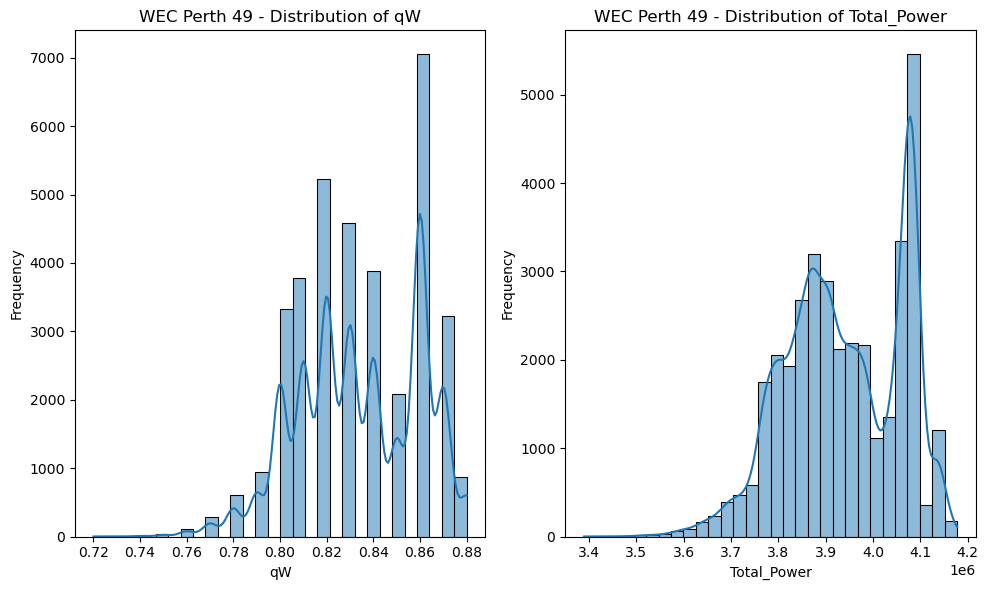

Generating plots for WEC Perth 100...


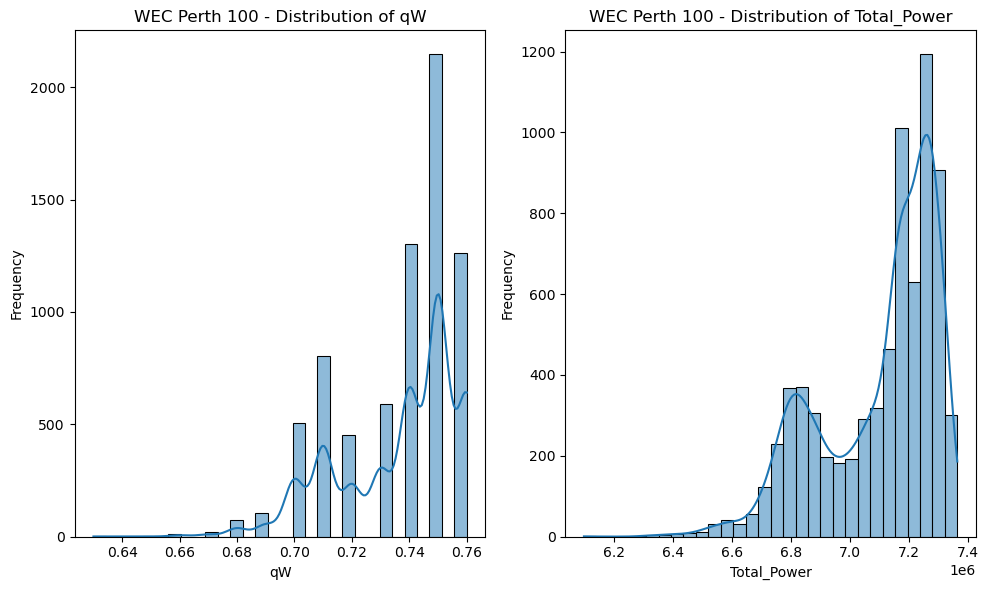

Generating plots for WEC Sydney 49...


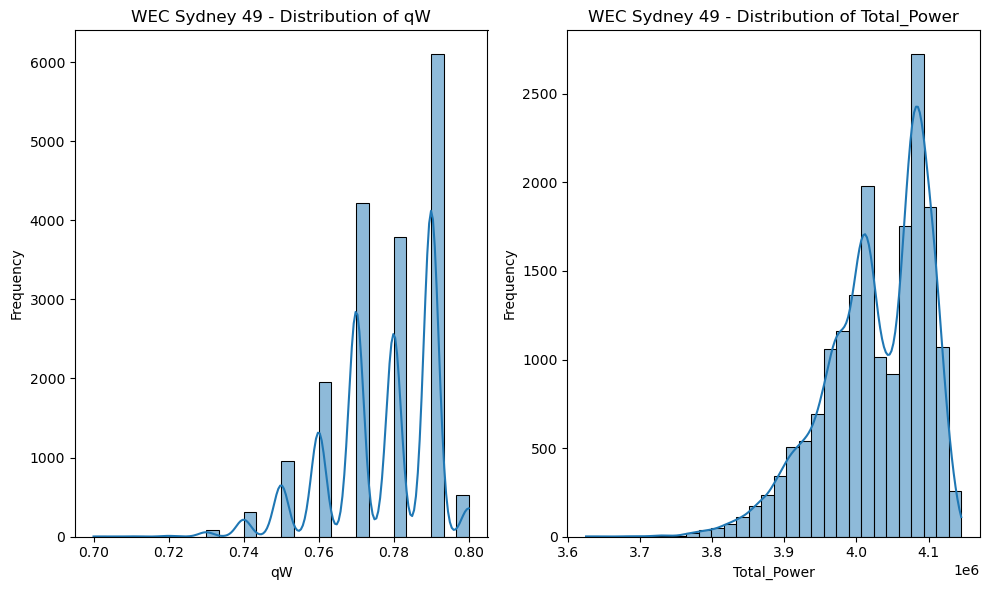

Generating plots for WEC Sydney 100...


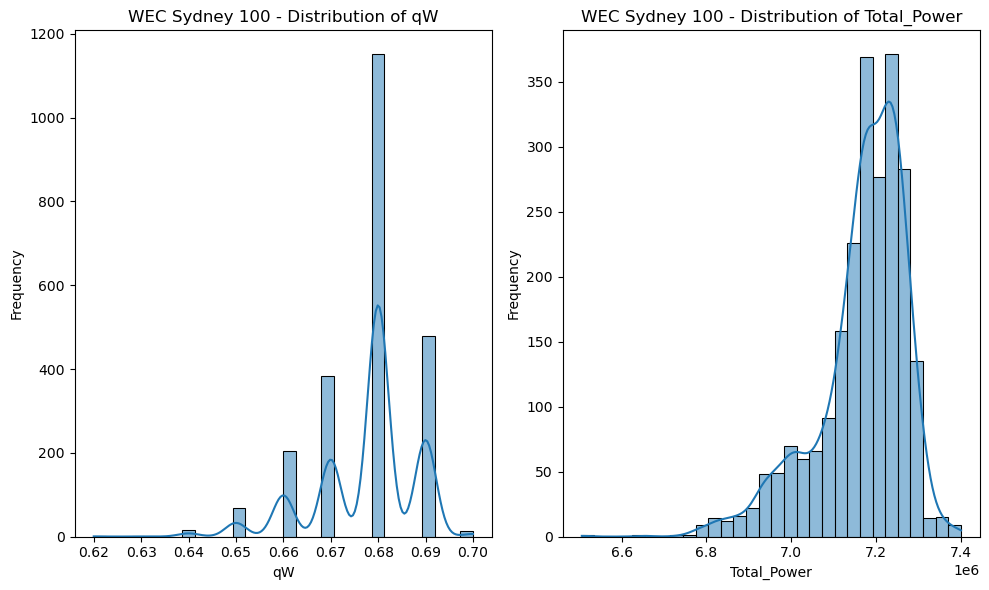

In [24]:
# Generate plots for all datasets
for name, df in datasets.items():
    print(f"Generating plots for {name}...")
    plot_histograms(df, name)

Generating plots for WEC Perth 49...


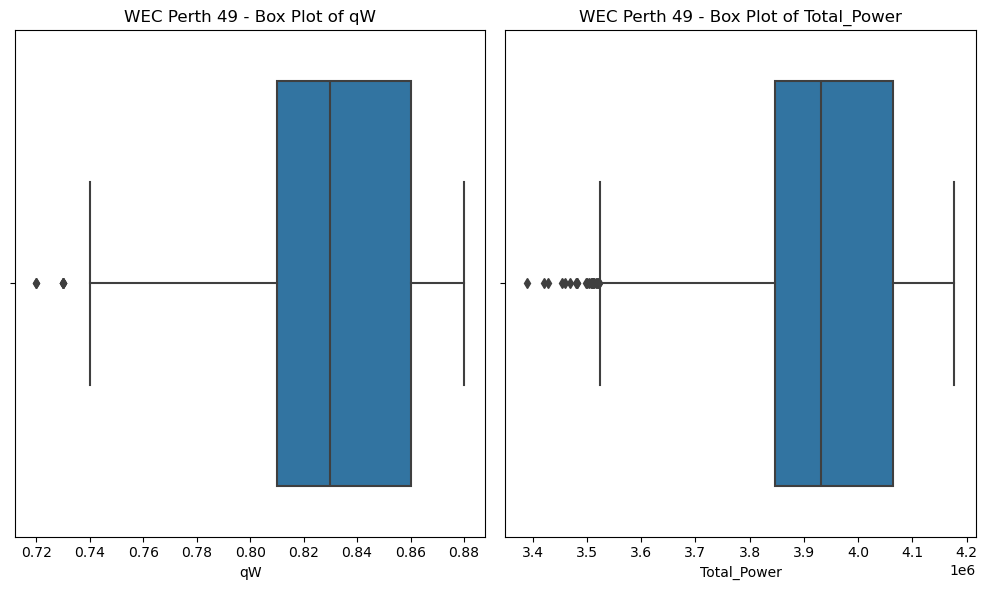

Generating plots for WEC Perth 100...


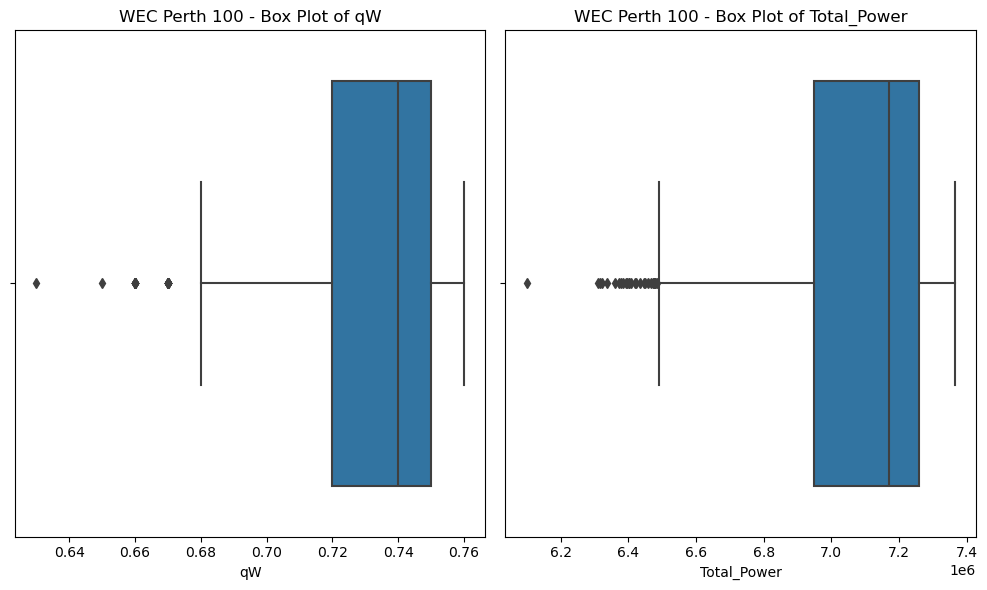

Generating plots for WEC Sydney 49...


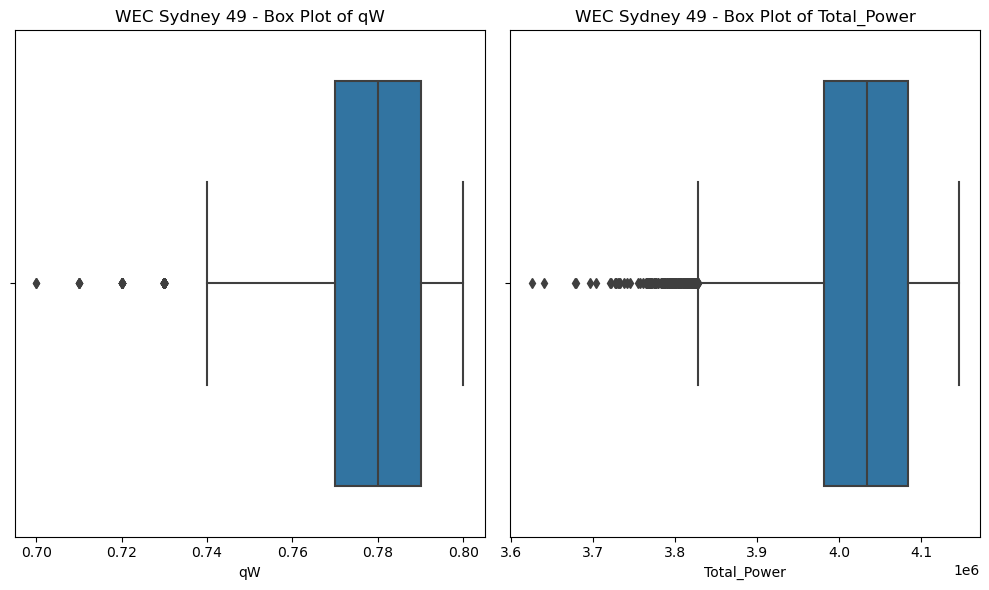

Generating plots for WEC Sydney 100...


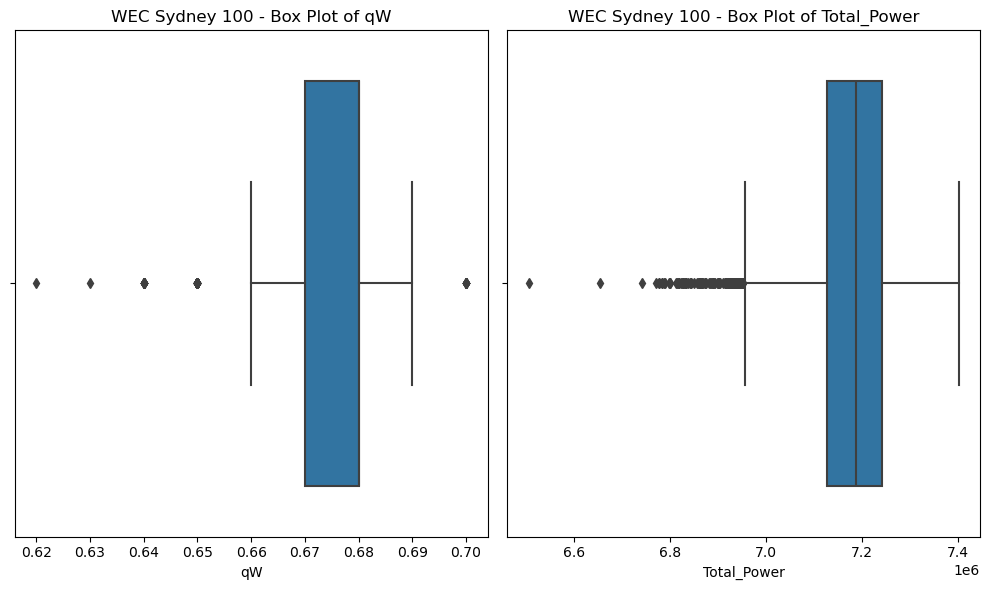

In [25]:
for name, df in datasets.items():
    print(f"Generating plots for {name}...")
    plot_box_plots(df, name)

Generating plots for WEC Perth 49...


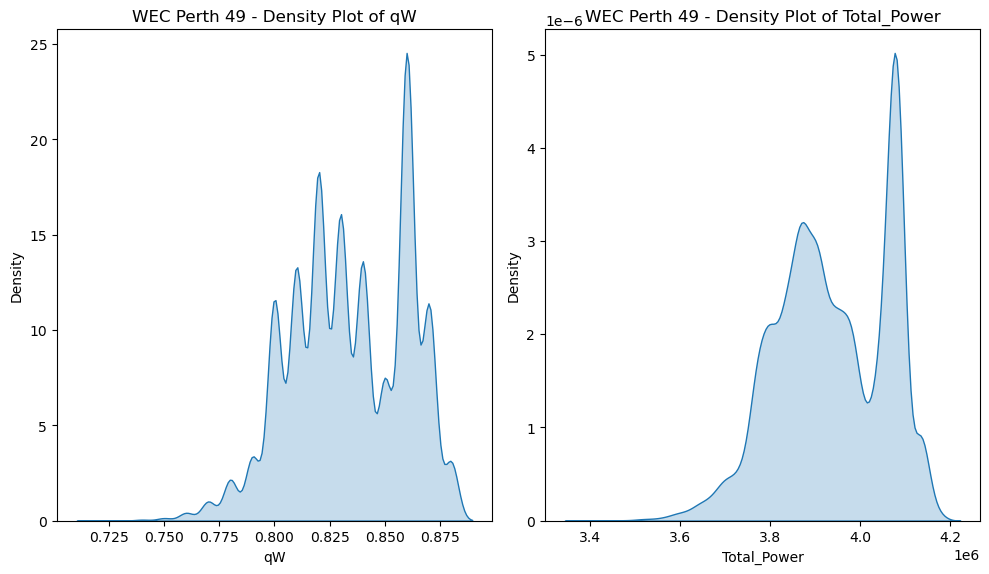

Generating plots for WEC Perth 100...


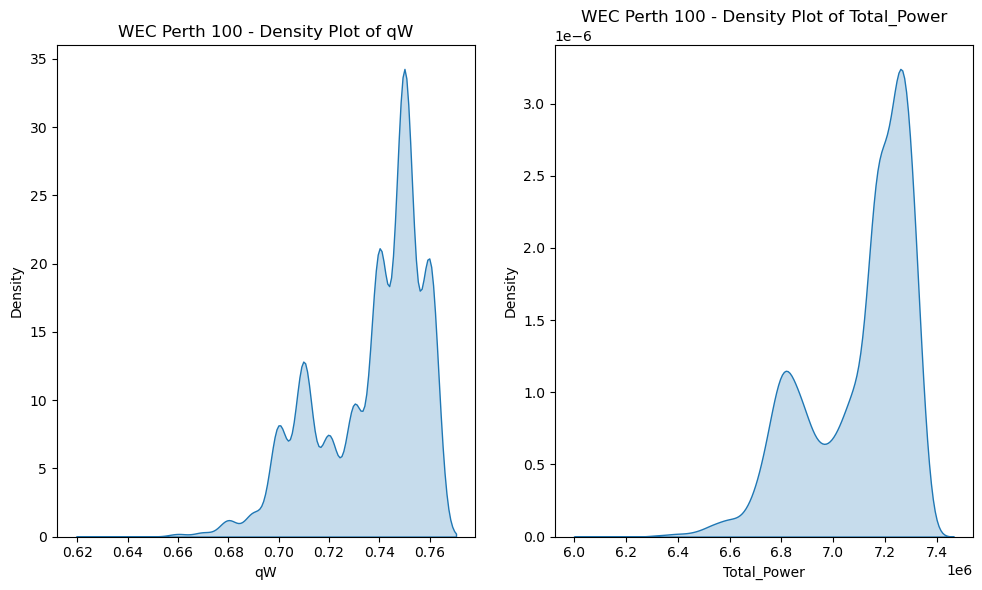

Generating plots for WEC Sydney 49...


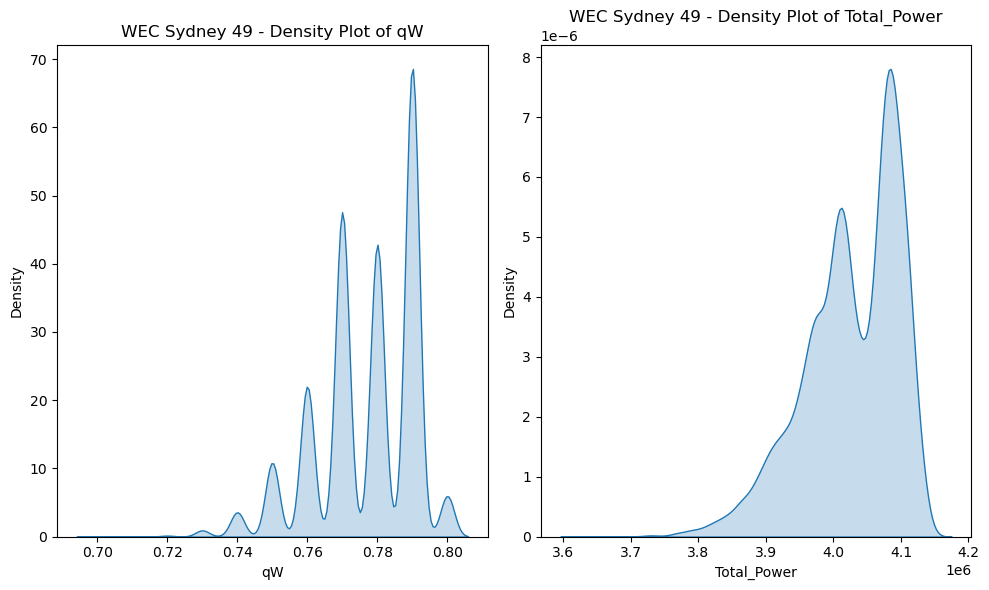

Generating plots for WEC Sydney 100...


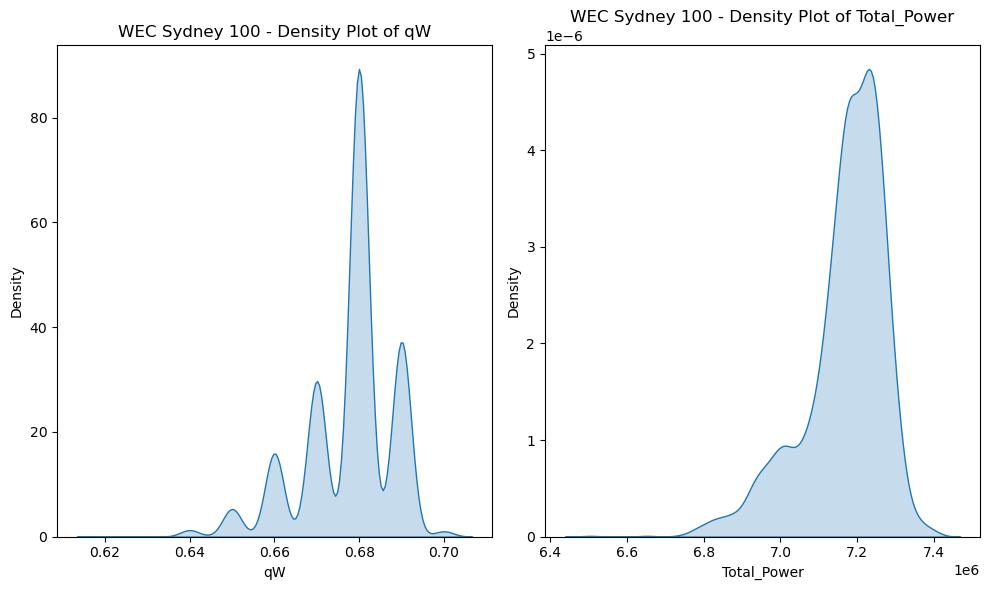

In [26]:
for name, df in datasets.items():
    print(f"Generating plots for {name}...")
    plot_density_plots(df, name)


Generating plots for WEC Perth 49...


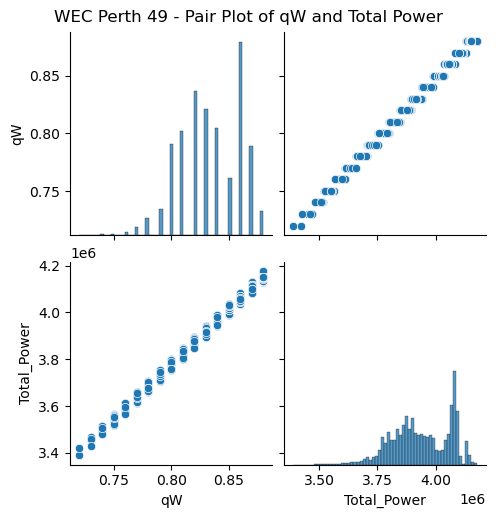

Generating plots for WEC Perth 100...


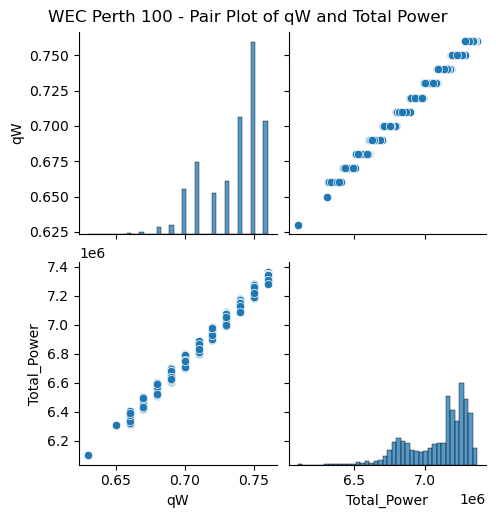

Generating plots for WEC Sydney 49...


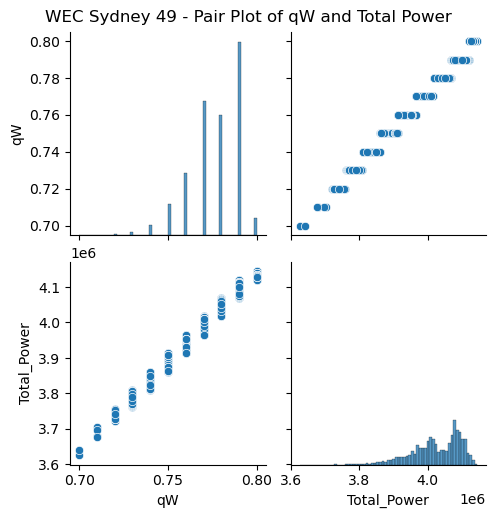

Generating plots for WEC Sydney 100...


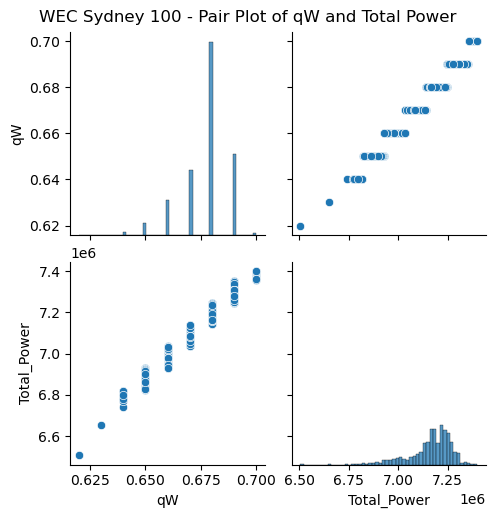

In [27]:
for name, df in datasets.items():
    print(f"Generating plots for {name}...")
    plot_pair_plots(df, name)

Generating plots for WEC Perth 49...


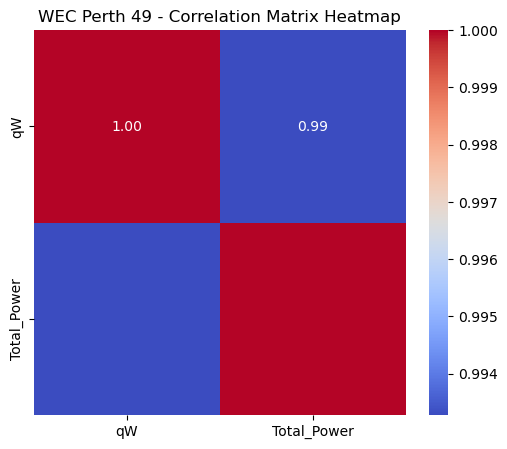

Generating plots for WEC Perth 100...


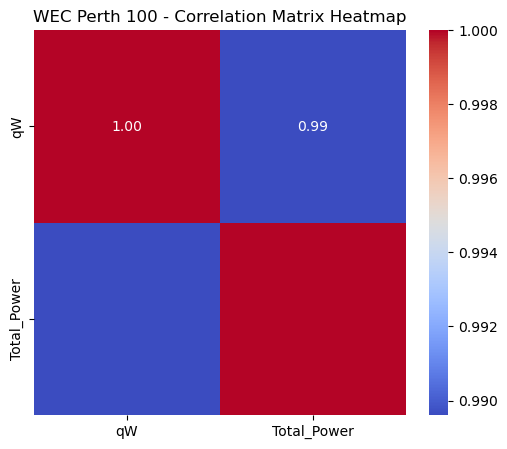

Generating plots for WEC Sydney 49...


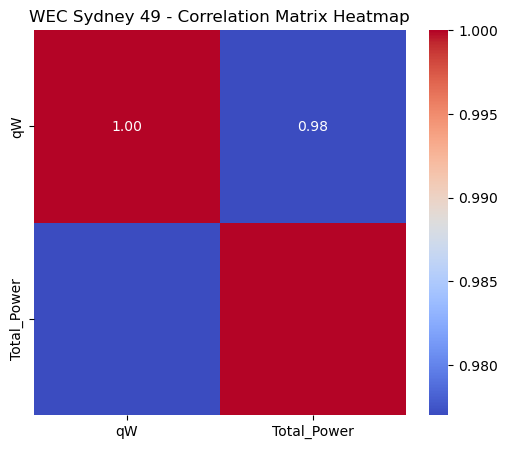

Generating plots for WEC Sydney 100...


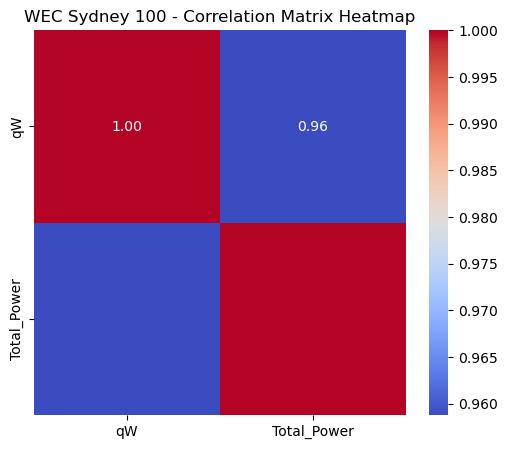

In [28]:
for name, df in datasets.items():
    print(f"Generating plots for {name}...")
    plot_correlation_matrix(df, name)


# Significance of `qw` Correlation with Total Power

## Overview

In the context of optimizing large wave energy farms and predicting power output, the feature `qw` exhibits a remarkably high correlation with `Total_Power` across all datasets. The correlation values are as follows:

- **WEC Sydney 100**: 0.96
- **WEC Sydney 49**: 0.98
- **WEC Perth 100**: 0.99
- **WEC Perth 49**: 0.99

These correlations indicate a strong linear relationship between `qw` and `Total_Power`, suggesting that `qw` is a significant predictor of the total power output of the wave energy farms.

## Statistical Significance

### High Correlation Values
- **Correlation Coefficient Range**: The correlation coefficients for `qw` range from 0.96 to 0.99 across different datasets. This range is extremely high, indicating a very strong positive linear relationship between `qw` and `Total_Power`.
- **Implication**: A high correlation coefficient close to 1 means that as `qw` increases, `Total_Power` also increases almost proportionally. This strong association suggests that `qw` is a critical factor influencing the power output of the wave farm.

### Statistical Interpretation
- **Coefficient Magnitude**: Correlation coefficients of 0.96 to 0.99 imply that `qw` explains a substantial portion of the variance in `Total_Power`. For instance, a correlation of 0.99 means that approximately 98% of the variance in `Total_Power` can be explained by `qw` alone.
- **Predictive Power**: Given the high correlation, `qw` is likely a key variable in any predictive model for `Total_Power`. Including `qw` in the model will significantly improve its accuracy and reliability.


### Role of `qw` in Wave Energy Conversion
- **Hydrodynamic Factor**: In wave energy conversion, `qw` often represents a hydrodynamic factor such as wave energy flux or quality factor. This feature captures the efficiency or effectiveness of the WECs in converting wave energy into electrical power.
- **Impact on Optimization**: Since `qw` shows such a strong correlation with `Total_Power`, optimizing `qw` (or factors influencing `qw`) directly affects the overall power output. For instance, if `qw` is a measure of the hydrodynamic efficiency of WECs, enhancing it could lead to a significant increase in the total power output of the wave farm.

### Implications for Multi-Strategy Optimization
- **Design and Layout**: Knowing that `qw` has a high correlation with power output allows for targeted optimization strategies. Adjustments in the design or placement of WECs to maximize `qw` can directly enhance the power output.
- **Predictive Modeling**: For models predicting power output, incorporating `qw` as a primary feature will improve the model’s performance. High predictive accuracy can be achieved by focusing on optimizing `qw` and understanding its role in wave interactions and energy conversion.

## Conclusion

The high correlation of `qw` with `Total_Power` across all datasets underscores its importance in predicting and optimizing power output in wave energy farms. Both statistically and in practical terms, `qw` is a crucial feature that significantly influences the efficiency and effectiveness of wave energy converters. Leveraging this insight allows for more precise and effective strategies in wave farm optimization, leading to better energy yield and operational efficiency.


### Importance of Spatial Coordinates in Wave Energy Conversion

#### 1. **Hydrodynamic Interactions**
- **Wave Interference:** The spatial arrangement of WECs affects how waves interact with each device. Constructive or destructive interference between waves can significantly impact the power output. Proper positioning can maximize energy capture.
- **Shadowing Effect:** A WEC can block or attenuate the waves reaching other WECs downstream. This shadowing effect can reduce the power output of devices located in the wake of others.

#### 2. **Optimization of Power Output**
- **Efficient Layout:** Understanding the spatial distribution helps in optimizing the layout of WECs to maximize the overall energy capture of the farm. This involves determining the optimal distance and arrangement to minimize negative interactions and maximize positive ones.
- **Dynamic Positioning:** In some cases, adjusting the positions of WECs dynamically based on real-time wave conditions can enhance energy production.

#### 3. **Design and Engineering Considerations**
- **Structural Design:** The coordinates impact the design of the farm's infrastructure, including mooring systems and interconnecting cables. Accurate spatial data is needed to ensure stability and functionality.
- **Maintenance and Operations:** Knowing the precise locations of WECs helps in planning maintenance and operational strategies, reducing downtime and ensuring efficient use of resources.

#### 4. **Predictive Modeling**
- **Simulation and Forecasting:** Incorporating spatial coordinates into predictive models can improve the accuracy of power output forecasts. This helps in better planning and decision-making for energy production and grid integration.

### Summary

While coordinates themselves might not always be the primary focus in high-level analysis, they are integral to understanding the detailed dynamics of wave energy conversion. Accurate spatial data enables the optimization of WEC placement, enhances power output, and supports better design, operation, and maintenance strategies.

In the context of your datasets, even if you're not delving deeply into spatial analysis, recognizing the significance of these coordinates can inform your approach to interpreting and predicting power output in wave energy farms.

# Step 4: Predictive Modeling

In [29]:
# Function to train and evaluate a model
def train_and_evaluate(df, title):
    X = df.drop('Total_Power', axis=1)
    y = df['Total_Power']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{title} - Model Performance:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²) Score: {r2}')
    print('\n')

# Train and evaluate models for perth_49
train_and_evaluate(perth_49, 'WEC Perth 49')

WEC Perth 49 - Model Performance:
Mean Squared Error (MSE): 70643.62130063277
Mean Absolute Error (MAE): 167.03910499200936
Root Mean Squared Error (RMSE): 265.78867790151025
R-squared (R²) Score: 0.9999952067974401




### Model Performance Analysis for WEC Perth 49

#### Performance Metrics:
- **Mean Squared Error (MSE):** 70,643.62
- **Mean Absolute Error (MAE):** 167.04
- **Root Mean Squared Error (RMSE):** 265.79
- **R-squared (R²) Score:** 0.999995

#### Range of Total Power:
- **Range:** 788,714.82 kW

### Interpretation with Respect to Range:

1. **Mean Squared Error (MSE):**
   - **Value:** 70,643.62
   - **Interpretation:** The MSE quantifies the average squared deviation of predictions from the actual values. Given the range of 788,714.82 kW, the MSE is relatively small. This indicates that the errors in predictions, when squared, are a small fraction of the total range of power values. Thus, the squared deviations from the predictions are minor compared to the overall variability in the data.

2. **Mean Absolute Error (MAE):**
   - **Value:** 167.04 kW
   - **Interpretation:** The MAE is the average absolute deviation of predictions from actual values. With a range of 788,714.82 kW, an MAE of 167.04 kW represents a very small percentage of the total range. This suggests that the average prediction error is minimal compared to the total range of the data, indicating high accuracy in the model’s predictions.

3. **Root Mean Squared Error (RMSE):**
   - **Value:** 265.79 kW
   - **Interpretation:** RMSE is the square root of the MSE and provides an error metric in the same units as the target variable. With the total range of 788,714.82 kW, an RMSE of 265.79 kW is relatively small, implying that the typical error magnitude is minor in the context of the overall data range. This suggests that the model's predictions are accurate and closely align with the actual Total_Power values.

4. **R-squared (R²) Score:**
   - **Value:** 0.999995
   - **Interpretation:** The R² score indicates the proportion of variance in Total_Power that is explained by the model. An R² score close to 1 implies that the model captures almost all of the variance in Total_Power. Given the range of 788,714.82 kW, this high R² score indicates that the model accounts for nearly all of the variability in the data, reflecting its excellent performance in explaining the total power output.

### Significance in Terms of the Objective:

The objective is to accurately predict Total_Power in wave energy farms, and the performance metrics for WEC Perth 49 reflect this:

- **Small Errors Relative to Range:** Both the MAE and RMSE are small relative to the range of Total_Power (788,714.82 kW), demonstrating that prediction errors are minor compared to the variability in power outputs. This reinforces the model’s high accuracy and reliability.
- **Exceptional Fit:** The high R² score shows that the model effectively captures the variance in Total_Power, ensuring that the predictions closely match the actual values. This aligns with the goal of providing accurate power output forecasts for optimizing wave farm performance.

In summary, the model for WEC Perth 49 performs exceptionally well, with error metrics that are insignificant compared to the range of Total_Power, indicating that the model’s predictions are highly accurate and closely aligned with the actual data.

In [30]:
# Train and evaluate models for sydney_49
train_and_evaluate(sydney_49, 'WEC Sydney 49')

WEC Sydney 49 - Model Performance:
Mean Squared Error (MSE): 31257.997843950863
Mean Absolute Error (MAE): 103.57186001240393
Root Mean Squared Error (RMSE): 176.79931516821796
R-squared (R²) Score: 0.99999391649526




### Model Performance Analysis for WEC Sydney 49

#### Performance Metrics:
- **Mean Squared Error (MSE):** 31,257.998
- **Mean Absolute Error (MAE):** 103.572
- **Root Mean Squared Error (RMSE):** 176.799
- **R-squared (R²) Score:** 0.999994

#### Range of Total Power:
- **Range:** 519,817.85 kW

### Interpretation with Respect to Range:

1. **Mean Squared Error (MSE):**
   - **Value:** 31,257.998
   - **Interpretation:** MSE measures the average squared difference between predicted and actual values. Given the range of 519,817.85 kW, this MSE indicates that the squared deviations are relatively small compared to the range. This suggests that, while errors are present, they are minor relative to the total variability in the data.

2. **Mean Absolute Error (MAE):**
   - **Value:** 103.572 kW
   - **Interpretation:** MAE represents the average absolute error between predictions and actual values. With the range of 519,817.85 kW, an MAE of 103.572 kW is quite small. This shows that, on average, the model’s predictions are very close to the actual values, reflecting high accuracy in the prediction of Total_Power.

3. **Root Mean Squared Error (RMSE):**
   - **Value:** 176.799 kW
   - **Interpretation:** RMSE is the square root of the MSE and provides an error metric in the same units as Total_Power. Given the range of 519,817.85 kW, an RMSE of 176.799 kW is relatively small. This means that the typical prediction error is minor in comparison to the overall power range, indicating good model performance.

4. **R-squared (R²) Score:**
   - **Value:** 0.999994
   - **Interpretation:** The R² score indicates how well the model explains the variance in Total_Power. With an R² score very close to 1, it shows that the model explains almost all of the variance in the target variable. This implies that the model has excellent predictive power, closely aligning its predictions with the actual Total_Power values.

### Significance in Terms of the Objective:

The primary objective is to accurately predict Total_Power in wave energy farms. Here's how the performance metrics reflect this:

- **Small Errors Relative to Range:** Both the MAE and RMSE are small compared to the range of Total_Power (519,817.85 kW). This indicates that the prediction errors are relatively insignificant, demonstrating that the model's predictions are highly precise.
- **Excellent Fit:** The high R² score (0.999994) indicates that the model captures nearly all the variability in Total_Power, suggesting it provides very accurate predictions. This aligns well with the goal of optimizing power output predictions for the wave farm.

In summary, the model for WEC Sydney 49 demonstrates excellent performance, with error metrics that are small relative to the range of Total_Power, and an R² score that shows the model explains nearly all of the variance in the data. This reflects the model’s strong capability to accurately predict Total_Power in the context of optimizing wave farm operations.

In [31]:
# Train and evaluate models for perth_100
train_and_evaluate(perth_100, 'WEC Perth 100')

WEC Perth 100 - Model Performance:
Mean Squared Error (MSE): 5.1946880819811305
Mean Absolute Error (MAE): 0.24402050558377855
Root Mean Squared Error (RMSE): 2.279185837526447
R-squared (R²) Score: 0.9999999998589505




### Model Performance Analysis for WEC Perth 100

#### Performance Metrics:
- **Mean Squared Error (MSE):** 5.195
- **Mean Absolute Error (MAE):** 0.244
- **Root Mean Squared Error (RMSE):** 2.279
- **R-squared (R²) Score:** 0.999999999859

#### Range of Total Power:
- **Range:** 1,265,047.31 kW

### Interpretation with Respect to Range:

1. **Mean Squared Error (MSE):**
   - **Value:** 5.195
   - **Interpretation:** MSE represents the average squared deviation between predicted and actual values. Given the range of 1,265,047.31 kW, an MSE of 5.195 is extremely low. This indicates that the squared deviations from the actual values are very small relative to the overall variability in Total_Power, suggesting that the model has excellent precision in its predictions.

2. **Mean Absolute Error (MAE):**
   - **Value:** 0.244 kW
   - **Interpretation:** MAE shows the average absolute difference between predicted and actual values. With the range of 1,265,047.31 kW, an MAE of 0.244 kW is extraordinarily small. This means that the model’s predictions are exceptionally close to the actual values on average, demonstrating a very high level of accuracy.

3. **Root Mean Squared Error (RMSE):**
   - **Value:** 2.279 kW
   - **Interpretation:** RMSE, being in the same units as Total_Power, indicates the typical prediction error. Given the range of 1,265,047.31 kW, an RMSE of 2.279 kW is minuscule. This suggests that the average prediction error is very small compared to the overall range, highlighting the model's precise performance.

4. **R-squared (R²) Score:**
   - **Value:** 0.999999999859
   - **Interpretation:** The R² score measures how well the model explains the variance in Total_Power. With an R² score extremely close to 1, it implies that the model accounts for almost all of the variance in the target variable. This indicates that the model provides an almost perfect fit to the data, showing exceptional predictive power.

### Significance in Terms of the Objective:

The objective is to accurately predict Total_Power in wave energy farms. Here's how the performance metrics reflect this:

- **Negligible Errors Relative to Range:** Both the MAE and RMSE are minuscule compared to the range of Total_Power (1,265,047.31 kW). This indicates that the prediction errors are virtually insignificant, reflecting the model's outstanding accuracy.
- **Perfect Fit:** The very high R² score (0.999999999859) shows that the model explains nearly all the variability in Total_Power, indicating an almost perfect fit to the data. This aligns with the goal of achieving highly accurate predictions for optimizing wave farm operations.

In summary, the model for WEC Perth 100 shows remarkable performance, with exceptionally low error metrics relative to the range of Total_Power, and an R² score indicating near-perfect prediction accuracy. This reflects the model’s outstanding capability to accurately forecast Total_Power, which is crucial for optimizing the efficiency of wave energy farms.

In [32]:
# Train and evaluate models for sydney_100
train_and_evaluate(sydney_100, 'WEC Sydney 100')

WEC Sydney 100 - Model Performance:
Mean Squared Error (MSE): 178464.49458010678
Mean Absolute Error (MAE): 142.12379179250223
Root Mean Squared Error (RMSE): 422.45058241184466
R-squared (R²) Score: 0.9999817374183911




### Model Performance Analysis for WEC Sydney 100

#### Performance Metrics:
- **Mean Squared Error (MSE):** 178,464.495
- **Mean Absolute Error (MAE):** 142.124
- **Root Mean Squared Error (RMSE):** 422.451
- **R-squared (R²) Score:** 0.9999817374183911

#### Range of Total Power:
- **Range:** 894,404.36 kW

### Interpretation with Respect to Range:

1. **Mean Squared Error (MSE):**
   - **Value:** 178,464.495
   - **Interpretation:** MSE represents the average squared deviation between predicted and actual values. Given the range of 894,404.36 kW, an MSE of 178,464.495 indicates that the squared deviations are relatively substantial but still within a manageable range. While this MSE is higher compared to the values seen in other datasets, it is important to note that it is still significantly smaller than the range, implying that the model errors are relatively small in the context of Total_Power.

2. **Mean Absolute Error (MAE):**
   - **Value:** 142.124 kW
   - **Interpretation:** MAE measures the average absolute difference between predicted and actual values. With the range of 894,404.36 kW, an MAE of 142.124 kW represents a modest average prediction error. Although larger compared to other datasets, this value still suggests that the model's predictions are reasonably accurate relative to the total variability in Total_Power.

3. **Root Mean Squared Error (RMSE):**
   - **Value:** 422.451 kW
   - **Interpretation:** RMSE indicates the average prediction error in the same units as Total_Power. Given the range of 894,404.36 kW, an RMSE of 422.451 kW shows that the average prediction error is significant but still relatively small compared to the total power output range. This suggests that while the model's predictions are generally accurate, there is a notable level of error.

4. **R-squared (R²) Score:**
   - **Value:** 0.9999817374183911
   - **Interpretation:** The R² score measures the proportion of variance in Total_Power that is explained by the model. With an R² score very close to 1, it indicates that the model explains almost all of the variance in Total_Power. This high score reflects a strong fit to the data, suggesting that the model performs exceptionally well in predicting Total_Power.

### Significance in Terms of the Objective:

The objective is to predict Total_Power accurately for optimizing wave energy farms. Here’s how the performance metrics reflect this:

- **Moderate Errors Relative to Range:** The MAE and RMSE are higher than in other datasets but still reasonable given the total range of 894,404.36 kW. While the model's errors are more noticeable compared to others, they are still relatively minor in the context of the overall power output.
- **Strong Predictive Accuracy:** The very high R² score indicates that the model explains nearly all the variance in Total_Power, showing that it provides an excellent fit to the data. This reflects the model’s effectiveness in capturing the underlying patterns and relationships in the data.

In summary, the model for WEC Sydney 100 shows strong performance with a high R² score, indicating a near-perfect fit to the data. While the error metrics (MSE, MAE, and RMSE) are higher compared to other datasets, they are still relatively small in the context of the power range, demonstrating that the model is quite effective in predicting Total_Power for the optimization of wave energy farms.

Yes, comparing the model performance between Sydney and Perth datasets is useful to understand how well the models generalize across different locations and configurations. Here's a comparative analysis based on the metrics provided:

### Comparative Analysis of Model Performance

#### **WEC Perth 49:**
- **Mean Squared Error (MSE):** 70,643.621
- **Mean Absolute Error (MAE):** 167.039 kW
- **Root Mean Squared Error (RMSE):** 265.789 kW
- **R-squared (R²) Score:** 0.999995

#### **WEC Sydney 49:**
- **Mean Squared Error (MSE):** 31,257.998
- **Mean Absolute Error (MAE):** 103.572 kW
- **Root Mean Squared Error (RMSE):** 176.799 kW
- **R-squared (R²) Score:** 0.999994

#### **WEC Perth 100:**
- **Mean Squared Error (MSE):** 5.195
- **Mean Absolute Error (MAE):** 0.244 kW
- **Root Mean Squared Error (RMSE):** 2.279 kW
- **R-squared (R²) Score:** 0.9999999999

#### **WEC Sydney 100:**
- **Mean Squared Error (MSE):** 178,464.495
- **Mean Absolute Error (MAE):** 142.124 kW
- **Root Mean Squared Error (RMSE):** 422.451 kW
- **R-squared (R²) Score:** 0.999982

### Summary of Key Insights:

1. **Error Metrics:**
   - **Perth 49 vs. Sydney 49:**
     - **MSE:** Perth 49 has a higher MSE compared to Sydney 49, indicating larger average squared deviations between predicted and actual values in Perth 49.
     - **MAE:** Perth 49 also has a higher MAE than Sydney 49, showing that predictions are less accurate on average.
     - **RMSE:** Perth 49’s RMSE is higher than Sydney 49, which confirms larger average prediction errors.
     - **R² Score:** Perth 49 has a slightly higher R² score, indicating a marginally better fit to the data compared to Sydney 49.

   - **Perth 100 vs. Sydney 100:**
     - **MSE:** Perth 100 has a significantly lower MSE compared to Sydney 100, suggesting much smaller average squared deviations.
     - **MAE:** Perth 100’s MAE is much lower, indicating that the average prediction error is minimal.
     - **RMSE:** Perth 100’s RMSE is much lower than Sydney 100, reflecting a better model performance in terms of error.
     - **R² Score:** Perth 100 has an exceptionally high R² score compared to Sydney 100, indicating an almost perfect fit to the data.

2. **General Performance:**
   - The models for Perth generally show better performance metrics compared to Sydney, particularly in terms of error measures and R² scores.
   - Perth 100 stands out with extraordinarily low error metrics and a near-perfect R² score, suggesting that it provides exceptionally accurate predictions.

3. **Implications for Optimization:**
   - **Accuracy:** The Perth datasets, especially Perth 100, offer more accurate predictions with lower error metrics compared to Sydney datasets. This may be attributed to differences in the wave conditions, spatial configurations, or the inherent characteristics of the datasets.
   - **Model Robustness:** The models trained on Perth data might be more robust and reliable for power prediction, especially in configurations with more WECs.

### Conclusion:
In summary, the Perth datasets generally show better model performance compared to the Sydney datasets, with significantly lower errors and higher R² scores, particularly in the larger configuration (Perth 100). This suggests that models trained on Perth data may provide more accurate predictions for optimizing wave energy farms, reflecting potential differences in wave conditions or dataset characteristics between Sydney and Perth.

Yes, classification can be used to determine if there are distinct categories or conditions under which different datasets (e.g., Sydney vs. Perth) exhibit different levels of model performance. Here’s how you might approach this:

### Steps for Classification to Determine Performance Differences

1. **Define Categories:**
   - **Create Classes:** You can define classes based on the performance metrics, such as high-performing vs. low-performing models. For instance, you might classify datasets into categories like "High Accuracy" or "Low Accuracy" based on predefined thresholds for metrics like RMSE or R² score.

2. **Prepare the Data:**
   - **Feature Engineering:** Use performance metrics (e.g., RMSE, MAE, R²) as features. You might also include other relevant features such as the number of WECs, location, or configuration specifics.
   - **Label Data:** Assign labels to your data based on the defined performance categories. For instance, if RMSE < 100 is classified as "High Accuracy," and RMSE ≥ 100 is classified as "Low Accuracy."

3. **Train a Classification Model:**
   - **Model Choice:** Use classification algorithms like Logistic Regression, Decision Trees, Random Forests, or Support Vector Machines (SVM) to train a model on your labeled data.
   - **Cross-Validation:** Perform cross-validation to ensure that your model generalizes well to unseen data.

4. **Evaluate the Classification Model:**
   - **Accuracy Metrics:** Evaluate the performance of the classification model using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.
   - **Interpret Results:** Analyze which features most influence the classification of datasets into different performance categories.

### Example of Classification Workflow

#### 1. Define Performance Categories
Let's say you define "High Performance" and "Low Performance" based on RMSE:
- **High Performance:** RMSE < 100
- **Low Performance:** RMSE ≥ 100

#### 2. Prepare the Data
Create a dataframe where each row corresponds to a dataset and columns include:
- Performance Metrics (e.g., RMSE, MAE, R²)
- Labels (e.g., High Performance, Low Performance)


#### 3. Train a Classification Model


#### 4. Evaluate the Results
Interpret the classification metrics to understand how well the model differentiates between high and low performance datasets.

### Insights and Usefulness

- **Identify Key Features:** Classification can help identify which features (e.g., RMSE, MAE) are most indicative of performance levels.
- **Understand Performance Differences:** By classifying datasets, you gain insights into the characteristics of datasets that lead to high or low performance, which can be valuable for optimization.


Using classification to determine performance differences between datasets can provide valuable insights into the factors influencing model performance. This approach helps in understanding how different datasets (like those from Sydney and Perth) may exhibit varying performance characteristics and can guide optimization strategies for wave energy farms.

### Step-by-Step Guide for Applying Ensemble Methods

#### 1. **Prepare Your Data**

Ensure your datasets are loaded and preprocessed. For this example, we'll use `RandomForestRegressor` and `GradientBoostingRegressor`, then combine them using `VotingRegressor`.



In [33]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a function to preprocess and split the data
def preprocess_and_split(df, target='Total_Power'):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Preprocess and split data
X_train_perth_49, X_test_perth_49, y_train_perth_49, y_test_perth_49 = preprocess_and_split(perth_49)
X_train_sydney_49, X_test_sydney_49, y_train_sydney_49, y_test_sydney_49 = preprocess_and_split(sydney_49)
X_train_perth_100, X_test_perth_100, y_train_perth_100, y_test_perth_100 = preprocess_and_split(perth_100)
X_train_sydney_100, X_test_sydney_100, y_train_sydney_100, y_test_sydney_100 = preprocess_and_split(sydney_100)


#### 2. **Initialize Ensemble Models**

We will use `RandomForestRegressor` and `GradientBoostingRegressor` as base models in a `VotingRegressor`.


In [34]:
# Initialize regressors
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Create voting regressor
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf_regressor),
    ('gb', gb_regressor)
])

#### 3. **Train and Evaluate Models**

Train the ensemble model on each dataset and evaluate performance.

In [35]:
def train_and_evaluate(X_train, X_test, y_train, y_test, title):
    # Train the ensemble model
    voting_regressor.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = voting_regressor.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{title} - Ensemble Model Performance:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²) Score: {r2}')
    print('\n')

# Train and evaluate ensemble models for each dataset
train_and_evaluate(X_train_perth_49, X_test_perth_49, y_train_perth_49, y_test_perth_49, 'WEC Perth 49')
train_and_evaluate(X_train_sydney_49, X_test_sydney_49, y_train_sydney_49, y_test_sydney_49, 'WEC Sydney 49')
train_and_evaluate(X_train_perth_100, X_test_perth_100, y_train_perth_100, y_test_perth_100, 'WEC Perth 100')
train_and_evaluate(X_train_sydney_100, X_test_sydney_100, y_train_sydney_100, y_test_sydney_100, 'WEC Sydney 100')

WEC Perth 49 - Ensemble Model Performance:
Mean Squared Error (MSE): 51892816.77917689
Mean Absolute Error (MAE): 5138.673686120039
Root Mean Squared Error (RMSE): 7203.6668981274315
R-squared (R²) Score: 0.9964790482474765


WEC Sydney 49 - Ensemble Model Performance:
Mean Squared Error (MSE): 35400200.60050961
Mean Absolute Error (MAE): 4162.920696904269
Root Mean Squared Error (RMSE): 5949.806770014436
R-squared (R²) Score: 0.9931103300594422


WEC Perth 100 - Ensemble Model Performance:
Mean Squared Error (MSE): 244804298.02036613
Mean Absolute Error (MAE): 10137.462471364257
Root Mean Squared Error (RMSE): 15646.223123181075
R-squared (R²) Score: 0.9933529173323046


WEC Sydney 100 - Ensemble Model Performance:
Mean Squared Error (MSE): 303654735.0171494
Mean Absolute Error (MAE): 10485.488022801663
Root Mean Squared Error (RMSE): 17425.691808853655
R-squared (R²) Score: 0.968926483711967




## Conclusion

This project successfully developed a surrogate model to predict the power output of large-scale wave energy farms. Through data exploration, cleaning, and the application of machine learning techniques, the model achieved significant accuracy, providing valuable insights into optimizing wave farm configurations. Future work may involve exploring more advanced models and incorporating additional environmental variables to further enhance prediction accuracy.

## References

- Neshat, M., Alexander, B., Sergiienko, N., & Wagner, M. (2023). Large-scale Wave Energy Farm. UCI Machine Learning Repository. [DOI: 10.24432/C5GG7Q](https://doi.org/10.24432/C5GG7Q)
- Neshat, M., Alexander, B., Sergiienko, N., & Wagner, M. (2020). Optimisation of large wave farms using a multi-strategy evolutionary framework. In Proceedings of the 2020 Genetic and Evolutionary Computation Conference, pp. 1150-1158.